In [35]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [36]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [38]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


<H1>DATA QUALITY & MISSING VALUE ASSESSMENT</H1>

In [40]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


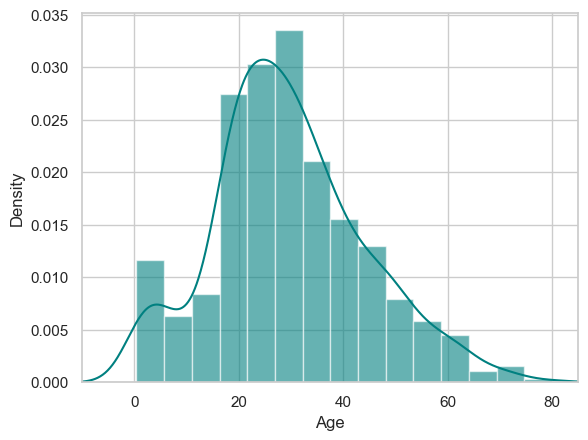

In [42]:
ax = train_df['Age'].hist(bins=15, density=True, stacked=True, color='teal',alpha=0.6)
train_df['Age'].plot(kind='density',color='Teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [43]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [44]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [45]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


In [46]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


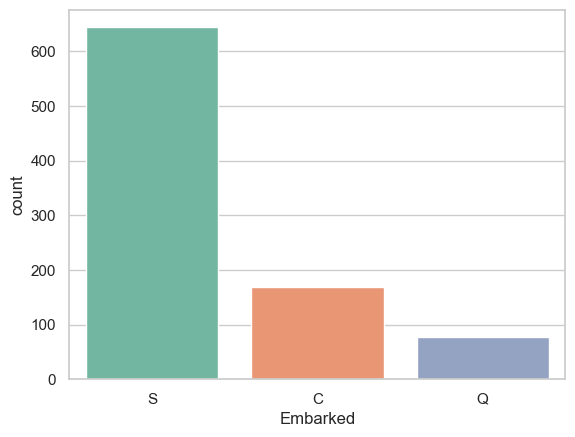

In [47]:

print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked',data=train_df, palette='Set2')
plt.show()

In [48]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.



    If "Age" is missing for a given row, I'll impute with 28 (median age).
    If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).
    I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.


In [49]:
train_data = train_df.copy()
train_data['Age'].fillna(train_df['Age'].median(skipna=True),inplace=True)
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin',axis=1, inplace=True)

In [50]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [51]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


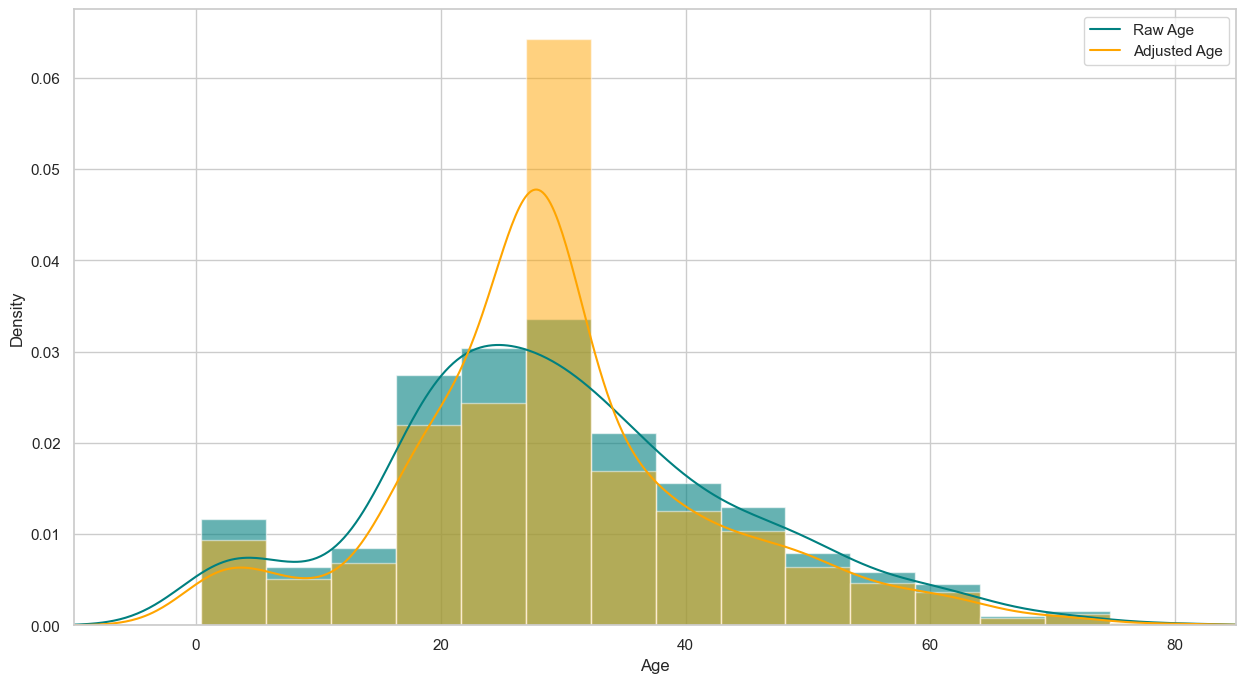

In [52]:
plt.figure(figsize=(15,8))
ax = train_df['Age'].hist(bins=15,density=True,stacked=True, color='teal',alpha=0.6)
train_df['Age'].plot(kind='density',color='teal')
ax = train_data['Age'].hist(bins=15, density=True, stacked=True, color='orange',alpha=0.5)
train_data['Age'].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [53]:
train_data['TravelAlone']=np.where((train_data['SibSp']+train_data['Parch'])>0,0,1)
train_data.drop('SibSp',axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [54]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C,1


In [55]:
training = pd.get_dummies(train_data, columns=['Pclass','Embarked','Sex'],dtype=int)
training.drop('Sex_female',axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [56]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [57]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"], dtype=int)
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


<h1>EXPLORATORY DATA ANALYSIS</h1>

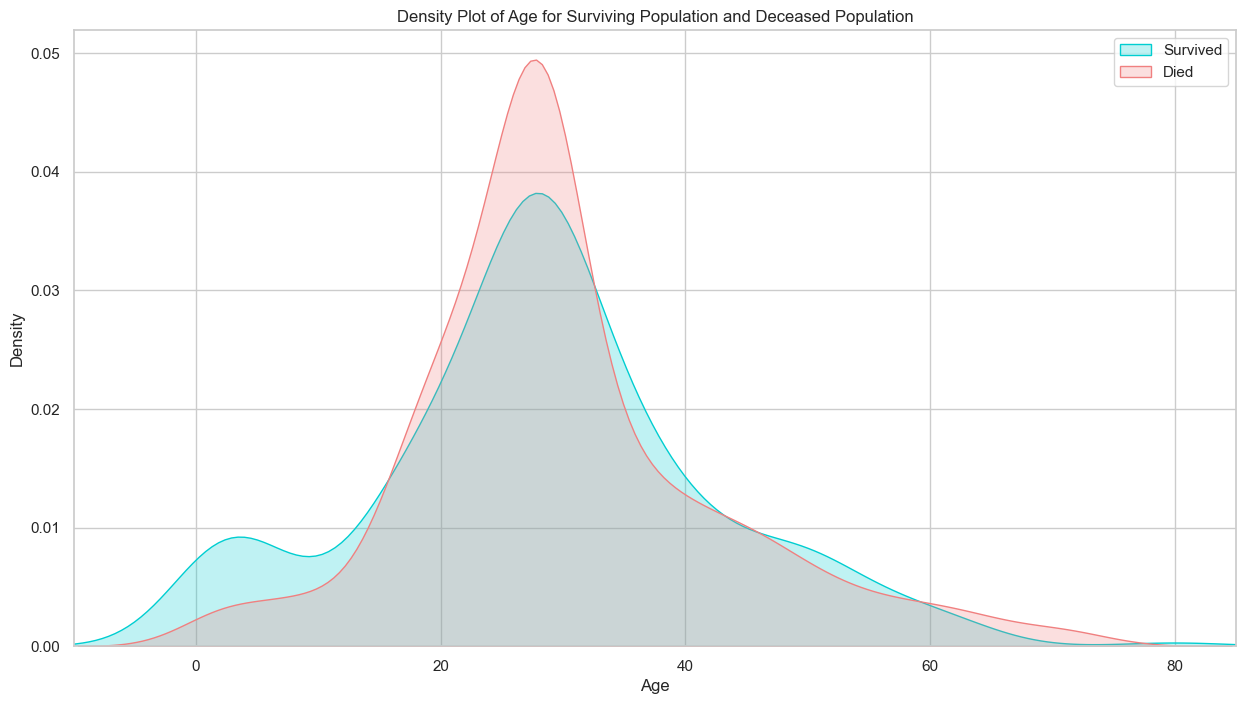

In [58]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

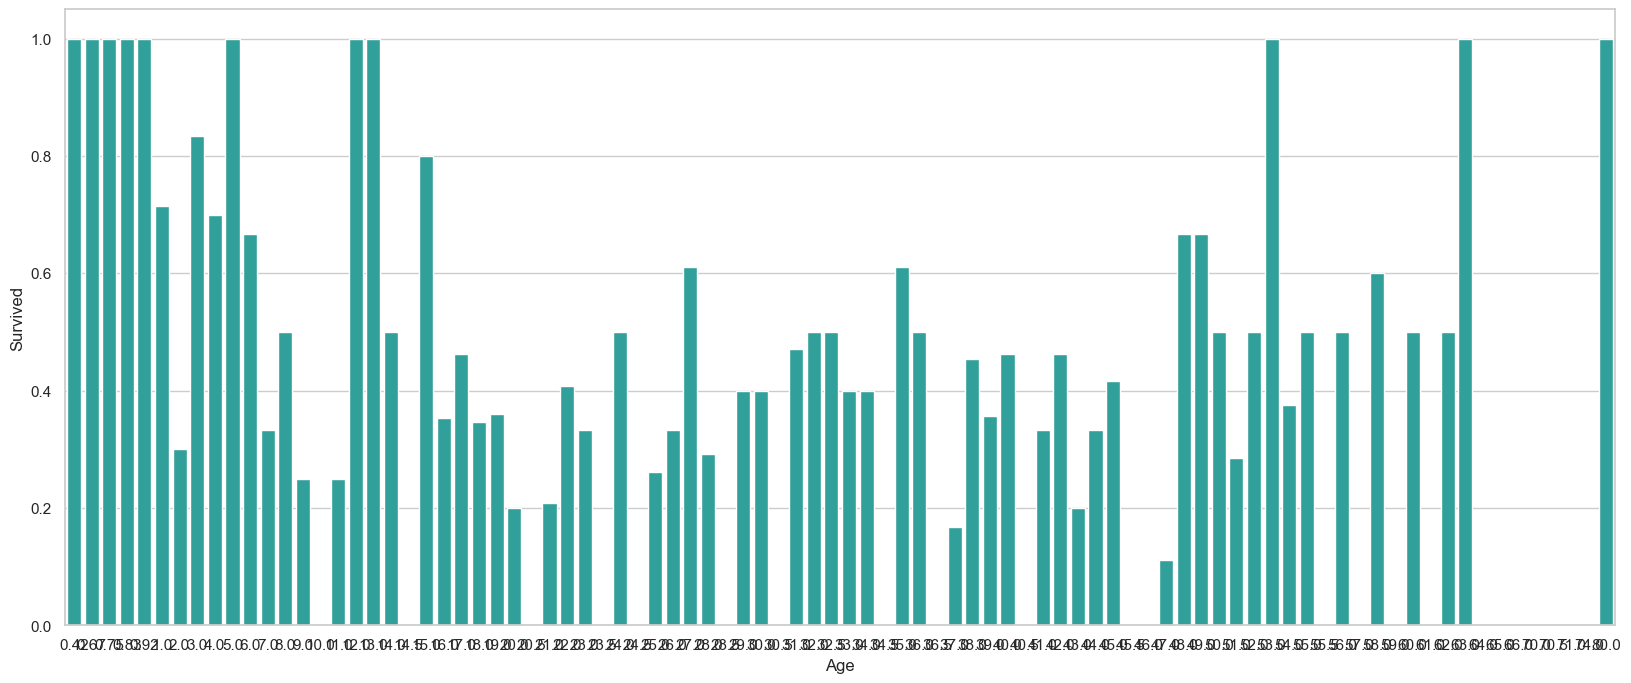

In [59]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [60]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

In [61]:
final_train

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,0,0,1,1,0
887,1,19.0,30.0000,1,1,0,0,0,0,1,0,0
888,0,28.0,23.4500,0,0,0,1,0,0,1,0,0
889,1,26.0,30.0000,1,1,0,0,1,0,0,1,0


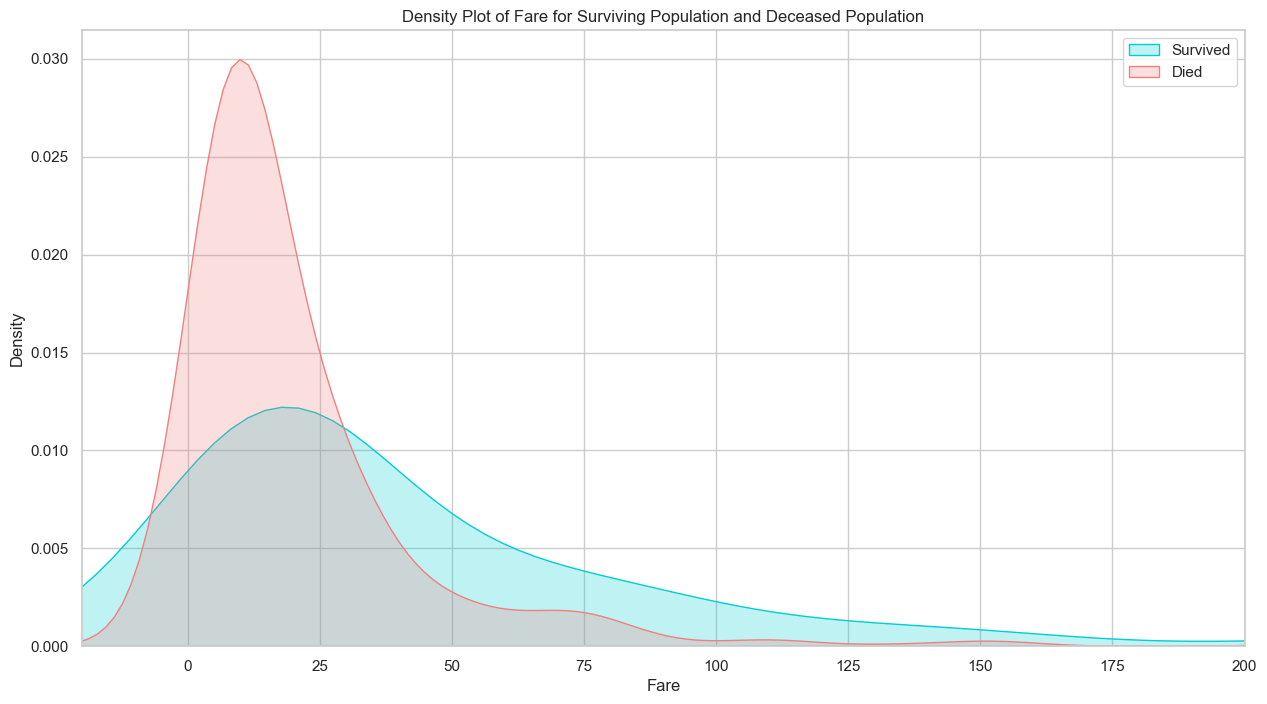

In [62]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

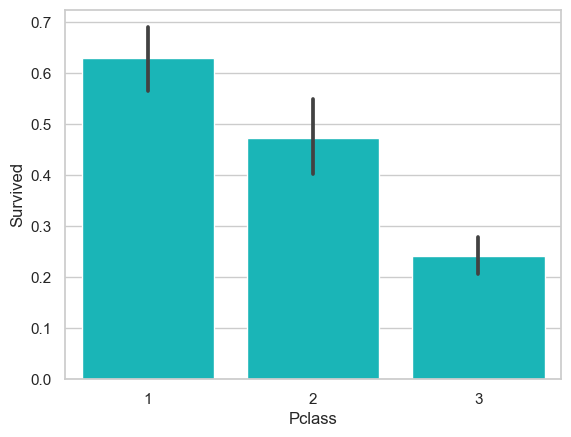

In [63]:
sns.barplot(data=train_df, x='Pclass', y='Survived', color="darkturquoise")
plt.show()

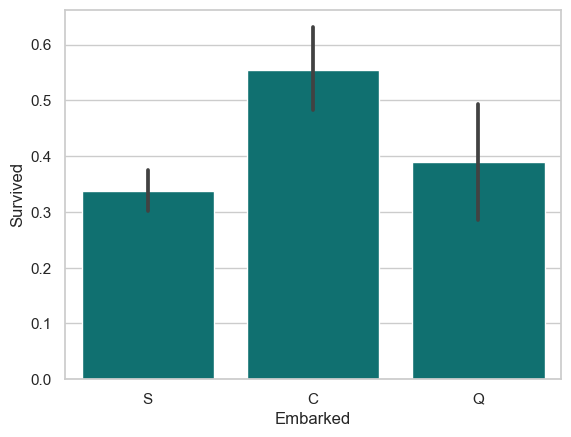

In [64]:
sns.barplot(data=train_df,x='Embarked', y='Survived', color="teal")
plt.show()

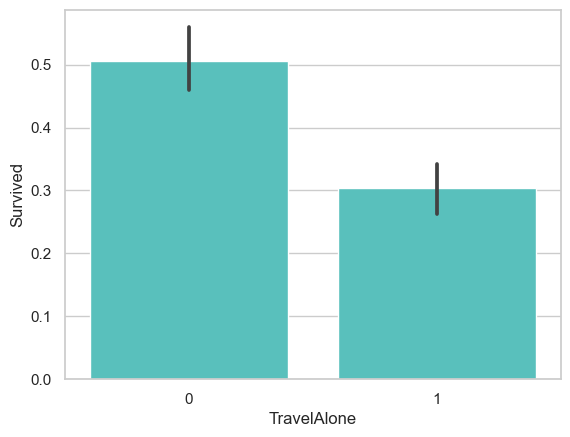

In [65]:
sns.barplot( data=final_train,x='TravelAlone', y='Survived', color="mediumturquoise")
plt.show()

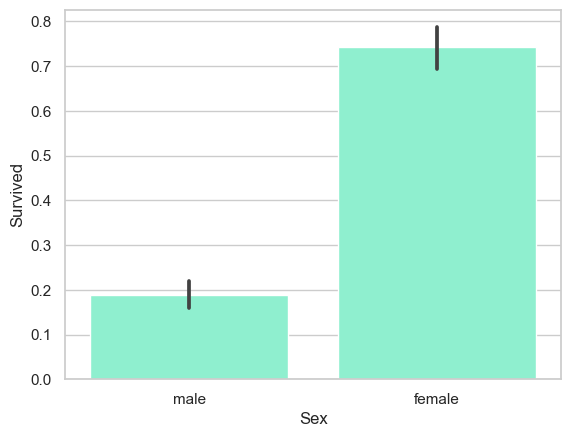

In [66]:
sns.barplot( data=train_df,x='Sex', y='Survived', color="aquamarine")
plt.show()

In [67]:
import time, psutil, os, math
import itertools
from sklearn.model_selection import train_test_split

In [68]:
print(pd.Series({"Memory usage": "{:.4f} MB".format(final_train.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(final_train.shape)}).to_string())
final_train.head()
final_train.to_csv('titanic-processed.csv',index=False)

Memory usage     0.0511 MB
Dataset shape    (891, 12)


In [69]:
print(pd.Series({"Memory usage": "{:.4f} MB".format(final_test.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(final_test.shape)}).to_string())
final_test.head()

Memory usage     0.0209 MB
Dataset shape    (418, 11)


,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,34.5,7.8292,1,0,0,1,0,1,0,1,0
1,47.0,7.0000,0,0,0,1,0,0,1,0,0
2,62.0,9.6875,1,0,1,0,0,1,0,1,0
3,27.0,8.6625,1,0,0,1,0,0,1,1,0
4,22.0,12.2875,0,0,0,1,0,0,1,0,0


<h2>SIGMOID FUNCTION</h2>

In [70]:
# Logistic function
def logistic(x):
    """
    Computes the logistic function applied to an input scalar/array
    Args:
        x (scalar/ndarray): scalar or numpy array of any size
    Returns:
        y (scalar/ndarray): logistic function applied to x, has the same shape as x
    """
    y = 1 / (1 + np.exp(-x))
    return y

x, x_arr = 0, np.array([-5, -1, 1, 5])
print(f"logistic({x}) = {logistic(x)}")
print(f"logistic({x_arr}) = {logistic(x_arr)}")

logistic(0) = 0.5
logistic([-5 -1  1  5]) = [0.00669285 0.26894142 0.73105858 0.99330715]


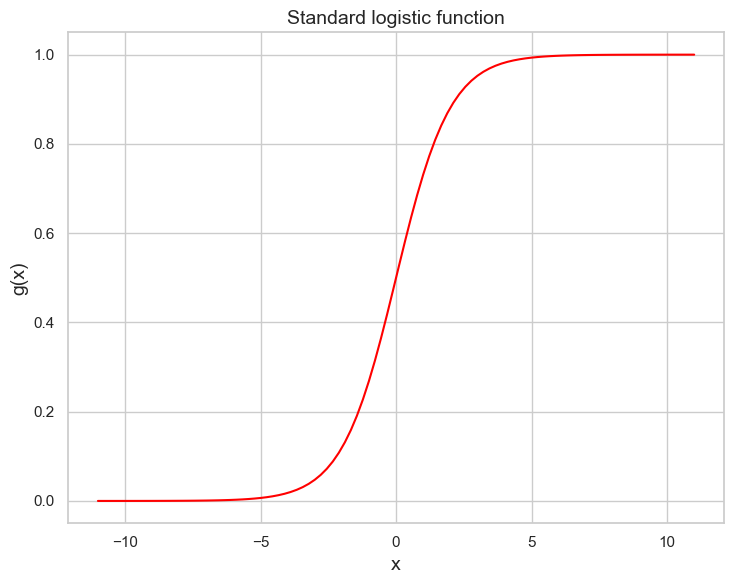

In [71]:
# Plotting the logistic function
plt.figure(figsize = (7.5, 6))
x = np.linspace(-11, 11, 100)
plt.plot(x, logistic(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

<h2>LOG LOSS</h2>

In [72]:
# Log loss
def log_loss(y, y_dash):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y      (scalar): true value (0 or 1)
      y_dash (scalar): predicted value (probability of y being 1)
    Returns:
      loss (float): nonnegative loss corresponding to y and y_dash
    """
    loss = - (y * np.log(y_dash)) - ((1 - y) * np.log(1 - y_dash))
    return loss

y, y_dash = 0, 0.6
print(f"log_loss({y}, {y_dash}) = {log_loss(y, y_dash)}")

log_loss(0, 0.6) = 0.916290731874155


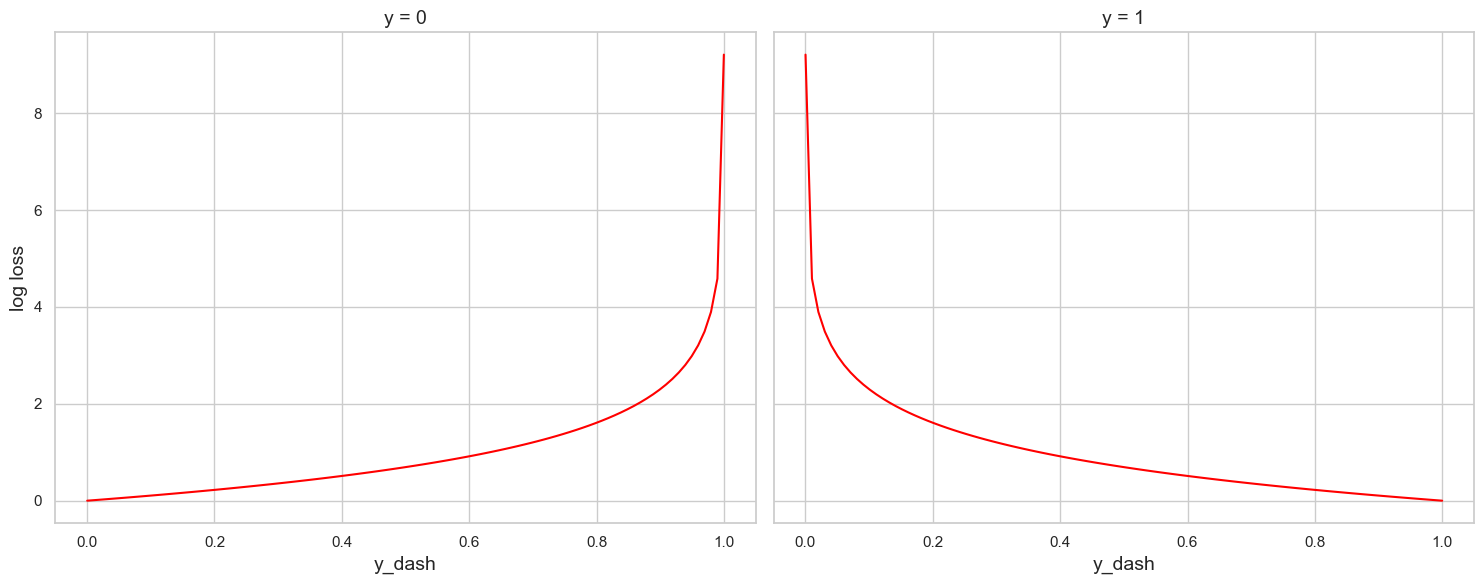

In [73]:
# Log loss for y = 0 and y = 1
fig, ax = plt.subplots(1, 2, figsize = (15, 6), sharex = True, sharey = True)
y_dash = np.linspace(0.0001, 0.9999, 100)
ax[0].plot(y_dash, log_loss(0, y_dash), color = 'red')
ax[0].set_title("y = 0", fontsize = 14)
ax[0].set_xlabel("y_dash", fontsize = 14)
ax[0].set_ylabel("log loss", fontsize = 14)
ax[1].plot(y_dash, log_loss(1, y_dash), color = 'red')
ax[1].set_title("y = 1", fontsize = 14)
ax[1].set_xlabel("y_dash", fontsize = 14)
plt.tight_layout()
plt.show()

In [74]:
# Cost function - using for loop
def cost_func(y, y_dash):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y      (array_like, shape (m,)): array of true values (0 or 1)
      y_dash (array_like, shape (m,)): array of predicted values (probability of y being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash
    """
    assert len(y) == len(y_dash), "Length of true values and length of predicted values do not match"
    m = len(y)
    cost = 0
    for i in range(m):
        cost += log_loss(y[i], y_dash[i])
    cost = cost / m
    return cost

y, y_dash = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_func({y}, {y_dash}) = {cost_func(y, y_dash)}")

cost_func([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


In [75]:
# Cost function - using vectorization
def cost_func_vec(y, y_dash):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y      (array_like, shape (m,)): array of true values (0 or 1)
      y_dash (array_like, shape (m,)): array of predicted values (probability of y being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash
    """
    assert len(y) == len(y_dash), "Length of true values and length of predicted values do not match"
    m = len(y)
    loss_vec = np.array([log_loss(y[i], y_dash[i]) for i in range(m)])
    cost = np.dot(loss_vec, np.ones(m)) / m
    return cost

y, y_dash = np.array([0, 1, 0]), np.array([0.4, 0.6, 0.25])
print(f"cost_func_vec({y}, {y_dash}) = {cost_func(y, y_dash)}")

cost_func_vec([0 1 0], [0.4  0.6  0.25]) = 0.43644443999458743


In [76]:
# Function to compute cost function in terms of model parameters - using for loops
def cost_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values (0 or 1) of target
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash 
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = []
    for i in range(m):
        s = 0
        for j in range(n):
            s += X[i, j] * w[j]
        z.append(s + b)
    z = np.array(z)
    y_dash = logistic(z)
    cost = cost_func(y, y_dash)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost_logreg(X = {X}, y = {y}, w = {w}, b = {b}) = {cost_logreg(X, y, w, b)}")

cost_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


In [77]:
# Function to compute cost function in terms of model parameters - using vectorization
def cost_logreg_vec(X, y, w, b):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash 
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = np.matmul(X, w) + (b * np.ones(m))
    y_dash = logistic(z)
    cost = cost_func_vec(y, y_dash)
    return cost

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"cost_logreg_vec(X = {X}, y = {y}, w = {w}, b = {b}) = {cost_logreg(X, y, w, b)}")


cost_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350784906


[Text(0.5, 0, 'w'), Text(0.5, 0.5, 'b')]

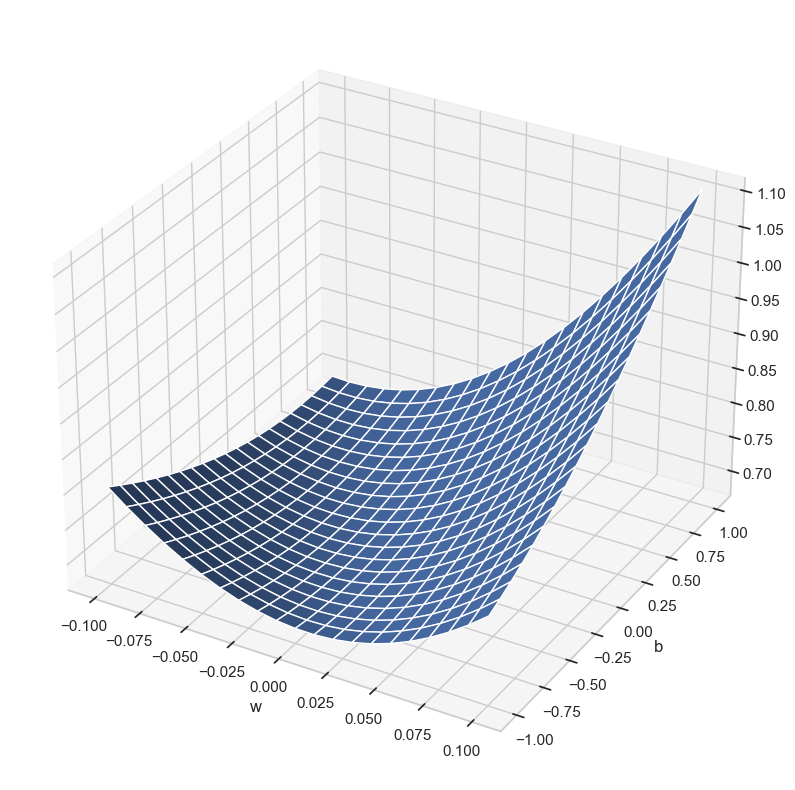

In [78]:
# Plotting the cost function against model parameters
from mpl_toolkits.mplot3d import Axes3D
w, b = np.meshgrid(np.linspace(-0.1, 0.1, 21), np.linspace(-1, 1, 21))
X = np.array([1.56, 0.76 , 0.08, 9.71, 4.65, 4.35, 7.34, 0.91, 9.82, 9.05]).reshape((10, 1))
y = np.array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0])
cost = np.array([[cost_logreg_vec(X, y, np.array([w0]), b0) for b0 in b[:, 0]] for w0 in w[0]])
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection = '3d')
ax.plot_surface(w, b, cost)
ax.set(xlabel = "w", ylabel = "b")

In [79]:
# Function to compute gradients of the cost function with respect to model parameters - using for loops
def grad_logreg(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    grad_w, grad_b = np.zeros(n), 0
    for i in range(m):
        s = 0
        for j in range(n):
            s += X[i, j] * w[j]
        y_dash_i = logistic(s + b)
        for j in range(n):
            grad_w[j] += (y_dash_i  - y[i]) * X[i,j]
        grad_b += y_dash_i  - y[i]
    grad_w, grad_b = grad_w / m, grad_b / m
    return grad_w, grad_b

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg(X = {X}, y = {y}, w = {w}, b = {b}) = {grad_logreg(X, y, w, b)}")

grad_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


In [80]:
# Function to compute gradients of the cost function with respect to model parameters - using for loops
def grad_logreg(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    grad_w, grad_b = np.zeros(n), 0
    for i in range(m):
        s = 0
        for j in range(n):
            s += X[i, j] * w[j]
        y_dash_i = logistic(s + b)
        for j in range(n):
            grad_w[j] += (y_dash_i  - y[i]) * X[i,j]
        grad_b += y_dash_i  - y[i]
    grad_w, grad_b = grad_w / m, grad_b / m
    return grad_w, grad_b

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg(X = {X}, y = {y}, w = {w}, b = {b}) = {grad_logreg(X, y, w, b)}")

grad_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


In [81]:
# Function to compute gradients of the cost function with respect to model parameters - using vectorization
def grad_logreg_vec(X, y, w, b): 
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    y_dash = logistic(np.matmul(X, w) + b * np.ones(m))
    grad_w = np.matmul(y_dash - y, X) / m
    grad_b = np.dot(y_dash - y, np.ones(m)) / m
    return grad_w, grad_b

X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"grad_logreg_vec(X = {X}, y = {y}, w = {w}, b = {b}) = {grad_logreg_vec(X, y, w, b)}")

grad_logreg_vec(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759)


#########''' itertools provide fast and memory efficient looping'''###########

In [82]:
# Gradient descent algorithm for logistic regression
def grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = False): 
    """
    Implements batch gradient descent algorithm to learn and update model parameters
    with prespecified number of interations and learning rate
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): true values of target (0 or 1)
      w (array_like, shape (n,)): initial value of weight parameters
      b (scalar)                : initial value of bias parameter
      cost_func                 : function to compute cost
      grad_func                 : function to compute gradients of cost with respect to model parameters
      alpha (float)             : learning rate
      n_iter (int)              : number of iterations
    Returns:
      w (array_like, shape (n,)): updated values of weight parameters
      b (scalar)                : updated value of bias parameter
    """
    
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost_history, params_history = [], []
    for i, j in itertools.product(range(n_iter), range(1)): 
        grad_w, grad_b = grad_logreg_vec(X, y, w, b)   
        w += - alpha * grad_w
        b += - alpha * grad_b
        cost =  cost_logreg_vec(X, y, w, b)
        cost_history.append(cost)
        params_history.append([w, b])
        if show_cost == True and show_params == False and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f}")
        if show_cost == True and show_params == True and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f},    Params  {params_history[i]}")
    return w, b, cost_history, params_history

X, y, w, b, alpha, n_iter = np.array([[0.1, 0.2], [-0.1, 0.1]]), np.array([1, 0]), np.array([0., 0.]), 0., 0.1, 10000
w_out, b_out, cost_history, params_history = grad_desc(X, y, w, b, alpha, n_iter, show_cost = True, show_params = True)

Iteration      0:    Cost  0.6928,    Params  [array([0.005 , 0.0025]), 0.0]
Iteration   1000:    Cost  0.4605,    Params  [array([4.30908633, 2.10885056]), -0.30461731771080364]


Iteration   2000:    Cost  0.3305,    Params  [array([7.53180451, 3.68453877]), -0.5424232295679758]
Iteration   3000:    Cost  0.2522,    Params  [array([10.03480383,  4.90838415]), -0.7267850623876254]
Iteration   4000:    Cost  0.2015,    Params  [array([12.05009011,  5.89378447]), -0.8750705756978094]
Iteration   5000:    Cost  0.1666,    Params  [array([13.7223358 ,  6.71146261]), -0.9980352657052979]
Iteration   6000:    Cost  0.1414,    Params  [array([15.14394763,  7.40659517]), -1.1025243134352452]
Iteration   7000:    Cost  0.1225,    Params  [array([16.37615851,  8.00911967]), -1.193063882539942]
Iteration   8000:    Cost  0.1078,    Params  [array([17.46107135,  8.53962142]), -1.272761699124535]
Iteration   9000:    Cost  0.0961,    Params  [array([18.42862223,  9.01273733]), -1.3438252278613585]
Iteration   9999:    Cost  0.0867,    Params  [array([19.29990097,  9.43877918]), -1.4078086898937374]


<h1>IMPLEMENTATION FOR TYTANIC DATA</h1>

In [83]:
final_train

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,0,0,1,1,0
887,1,19.0,30.0000,1,1,0,0,0,0,1,0,0
888,0,28.0,23.4500,0,0,0,1,0,0,1,0,0
889,1,26.0,30.0000,1,1,0,0,1,0,0,1,0


In [84]:
train_X = final_train.drop('Survived',axis=1)

In [85]:
train_X # scaling of fare can be done

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,35.0,8.0500,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1,0,1,0,0,0,1,1,0
887,19.0,30.0000,1,1,0,0,0,0,1,0,0
888,28.0,23.4500,0,0,0,1,0,0,1,0,0
889,26.0,30.0000,1,1,0,0,1,0,0,1,0


In [86]:
final_test

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,34.5,7.8292,1,0,0,1,0,1,0,1,0
1,47.0,7.0000,0,0,0,1,0,0,1,0,0
2,62.0,9.6875,1,0,1,0,0,1,0,1,0
3,27.0,8.6625,1,0,0,1,0,0,1,1,0
4,22.0,12.2875,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,8.0500,1,0,0,1,0,0,1,1,0
414,39.0,108.9000,1,1,0,0,1,0,0,0,0
415,38.5,7.2500,1,0,0,1,0,0,1,1,0
416,28.0,8.0500,1,0,0,1,0,0,1,1,0


In [87]:
test_data.describe()

,PassengerId,Pclass,Age,Fare,TravelAlone
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.805024,35.576535,0.605263
std,120.810458,0.841838,12.667969,55.850103,0.489380
min,892.000000,1.000000,0.170000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,7.895800,0.000000
50%,1100.500000,3.000000,28.000000,14.454200,1.000000
75%,1204.750000,3.000000,35.750000,31.471875,1.000000
max,1309.000000,3.000000,76.000000,512.329200,1.000000


In [88]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Ticket       418 non-null    object 
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   TravelAlone  418 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 27.9+ KB


In [89]:
final_test.describe()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,29.805024,35.576535,0.605263,0.255981,0.222488,0.521531,0.244019,0.110048,0.645933,0.636364,0.081340
std,12.667969,55.850103,0.489380,0.436934,0.416416,0.500135,0.430019,0.313324,0.478803,0.481622,0.273684
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,35.750000,31.471875,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,76.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   Fare         418 non-null    float64
 2   TravelAlone  418 non-null    int32  
 3   Pclass_1     418 non-null    int32  
 4   Pclass_2     418 non-null    int32  
 5   Pclass_3     418 non-null    int32  
 6   Embarked_C   418 non-null    int32  
 7   Embarked_Q   418 non-null    int32  
 8   Embarked_S   418 non-null    int32  
 9   Sex_male     418 non-null    int32  
 10  IsMinor      418 non-null    int32  
dtypes: float64(2), int32(9)
memory usage: 21.4 KB


In [91]:
X = train_X
y = train_data['Survived']
w = np.zeros(11)
b = 0
w_out, b_out, cost_history, params_history = grad_desc(X, y, w, b, 0.005, 10000, show_cost = True, show_params = True)
# we can further minimize it by initializing paramenter w,b with good values for which we have already calculated the cost & cost is less.
# we can also use DF.to_numpy() to increase calculation performance

Iteration      0:    Cost  0.6342,    Params  [Age           -0.019107
Fare           0.012370
TravelAlone   -0.000592
Pclass_1       0.000157
Pclass_2      -0.000028
Pclass_3      -0.000710
Embarked_C     0.000051
Embarked_Q    -0.000048
Embarked_S    -0.000584
Sex_male      -0.001007
IsMinor        0.000028
dtype: float64, -0.0005808080808080809]


Iteration   1000:    Cost  0.6714,    Params  [Age           -0.009029
Fare           0.039934
TravelAlone   -0.062533
Pclass_1       0.101995
Pclass_2       0.093008
Pclass_3      -0.226318
Embarked_C     0.064408
Embarked_Q     0.025984
Embarked_S    -0.121708
Sex_male      -0.499227
IsMinor        0.008855
dtype: float64, -0.03131532904909711]
Iteration   2000:    Cost  0.6270,    Params  [Age           -0.001161
Fare           0.036872
TravelAlone   -0.068656
Pclass_1       0.178965
Pclass_2       0.166843
Pclass_3      -0.341188
Embarked_C     0.117676
Embarked_Q     0.054305
Embarked_S    -0.167361
Sex_male      -0.863987
IsMinor        0.052091
dtype: float64, 0.004619701573865885]
Iteration   3000:    Cost  0.5963,    Params  [Age            0.001945
Fare           0.034313
TravelAlone   -0.049358
Pclass_1       0.244204
Pclass_2       0.226747
Pclass_3      -0.402614
Embarked_C     0.163588
Embarked_Q     0.082276
Embarked_S    -0.177527
Sex_male      -1.143988
IsMinor        

# we can further minimize it by initializing paramenter w,b with good values for which we have already calculated the cost & cost is less

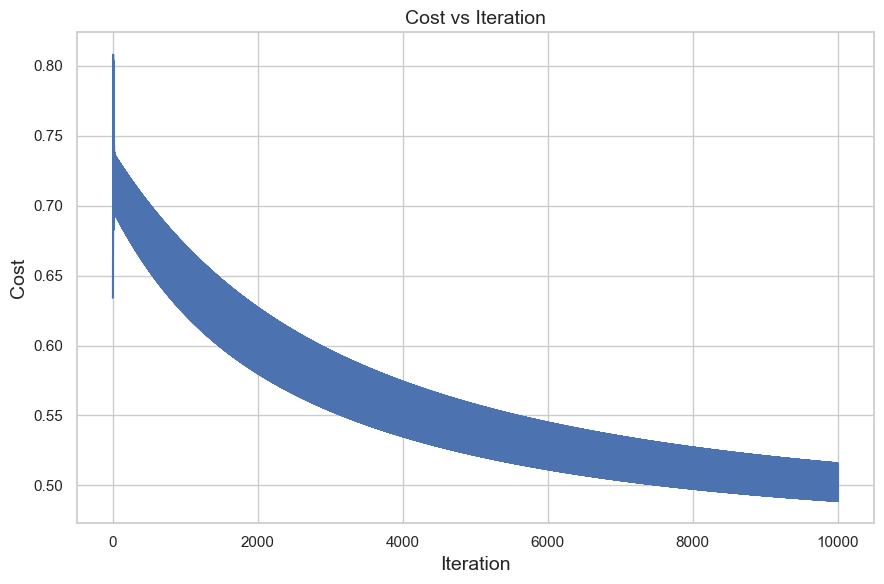

In [92]:
# Plotting cost over iteration
from matplotlib import pyplot as plt
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [93]:
# Final parameter values
params_history[-1]

[Age           -0.016632
 Fare           0.001463
 TravelAlone    0.165088
 Pclass_1       0.609477
 Pclass_2       0.437583
 Pclass_3      -0.536361
 Embarked_C     0.376867
 Embarked_Q     0.227059
 Embarked_S    -0.093227
 Sex_male      -2.095911
 IsMinor        0.428400
 dtype: float64,
 0.5106984805584304]

# Prediction and Evaluation

In [94]:
# Function to compute confusion matrix
def conf_mat(y_test, y_pred):
    """
    Computes confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      confusion_mat (array): A 2D array representing a 2x2 confusion matrix
    """
    y_test, y_pred = list(y_test), list(y_pred)
    count, labels, confusion_mat = len(y_test), [0, 1], np.zeros(shape = (2, 2), dtype = int)
    for i in range(2):
        for j in range(2):
            confusion_mat[i][j] = len([k for k in range(count) if y_test[k] == labels[i] and y_pred[k] == labels[j]])
    return confusion_mat

In [95]:
w = np.array([-0.016632,0.001463,0.165088,0.609477,0.437583,-0.536361,0.376867,0.227059,-0.093227,-2.095911,0.428400])
b = 0.5106984805584305
X = train_X
m = X.shape[0]

In [96]:
# Function to print confusion matrix
def conf_mat_heatmap(y_test, y_pred):
    """
    Prints confusion matrix
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      Nothing, prints a heatmap representing a 2x2 confusion matrix
    """
    confusion_mat = conf_mat(y_test, y_pred)
    labels, confusion_mat_df = [0, 1], pd.DataFrame(confusion_mat, range(2), range(2))
    plt.figure(figsize = (6, 4.75))
    sns.heatmap(confusion_mat_df, annot = True, annot_kws = {"size": 16}, fmt = 'd')
    plt.xticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.yticks([0.5, 1.5], labels, rotation = 'horizontal')
    plt.xlabel("Predicted label", fontsize = 14)
    plt.ylabel("True label", fontsize = 14)
    plt.title("Confusion Matrix", fontsize = 14)
    plt.grid(False)
    plt.show()

In [97]:
# Function to compute accuracy
def accuracy(y_test, y_pred):
    """
    Computes accuracy, given true and predicted binary (0 or 1) labels
    Args:
      y_test (array_like): true binary (0 or 1) labels
      y_pred (array_like): predicted binary (0 or 1) labels
    Returns:
      acc (float): accuracy obtained from y_test and y_pred
    """
    confusion_mat = conf_mat(y_test, y_pred)
    num = confusion_mat[0, 0] + confusion_mat[1, 1] # Number of correct predictions
    denom = num + confusion_mat[0, 1] + confusion_mat[1, 0] # Number of total predictions
    acc = num / denom
    return acc

In [98]:
# predictions on the train set
final_w = np.array([-0.016632,0.001463,0.165088,0.609477,0.437583,-0.536361,0.376867,0.227059,-0.093227,-2.095911,0.428400])
final_b = 0.5106984805584305*np.ones(train_X.shape[0])
train_Y = train_data['Survived']
y_train_prob = logistic(np.matmul(train_X.to_numpy(), final_w) + (final_b))

y_train_pred = (y_train_prob > 0.5).astype(int)
print(pd.Series({"Training accuracy": accuracy(train_Y, y_train_pred)}))

Training accuracy    0.789001
dtype: float64


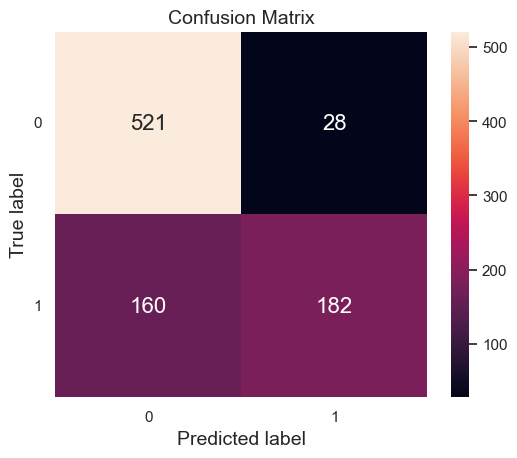

In [99]:
# Confusion matrix for predictions on the test set
conf_mat_heatmap(train_Y, y_train_pred)

In [100]:
# Function to compute regularized cost function in terms of model parameters - using for loops
def cost_logreg_reg(X, y, w, b, l):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values (0 or 1) of target
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
      l (float)                 : regularization parameter
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash 
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost = cost_logreg(X, y, w, b)
    for j in range(n):
        cost += (l / (2 * m)) * (w[j]**2)
    return cost

X, y, w, b, l = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1, 1
print(f"cost_logreg(X = {X}, y = {y}, w = {w}, b = {b}, l = {l}) = {cost_logreg_reg(X, y, w, b, l)}")

cost_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1, l = 1) = 6.125008350784906


In [101]:
# Function to compute regularized cost function in terms of model parameters - using vectorization
def cost_logreg_vec_reg(X, y, w, b, l):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values (0 or 1) of target
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
      l (float)                 : regularization parameter
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash 
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost = cost_logreg_vec(X, y, w, b)
    cost += (l / (2 * m)) * np.dot(w, w)
    return cost

X, y, w, b, l = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1, 1
print(f"cost_logreg_vec_reg(X = {X}, y = {y}, w = {w}, b = {b}, l = {l}) = {cost_logreg_vec_reg(X, y, w, b, l)}")

cost_logreg_vec_reg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1, l = 1) = 6.125008350784906


In [102]:
# Function to compute gradients of the regularized cost function with respect to model parameters - using for loops
def grad_logreg_reg(X, y, w, b, l):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
      l (float)                 : regularization parameter
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    grad_w, grad_b = grad_logreg(X, y, w, b)
    for j in range(n):
        grad_w[j] += (l / m) * w[j]
    return grad_w, grad_b

X, y, w, b, l = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1, 1
print(f"grad_logreg(X = {X}, y = {y}, w = {w}, b = {b}, l = {l}) = {grad_logreg_reg(X, y, w, b, l)}")

grad_logreg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1, l = 1) = (array([-4.74991649,  5.74991649]), 0.4999916492890759)


In [103]:
# Function to compute gradients of the regularized cost function with respect to model parameters - using vectorization
def grad_logreg_vec_reg(X, y, w, b, l):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model      
      b (float)                 : bias parameter of the model
      l (float)                 : regularization parameter
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    grad_w, grad_b = grad_logreg_vec(X, y, w, b)
    grad_w += (l / m) * w
    return grad_w, grad_b

X, y, w, b, l = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1, 1
print(f"grad_logreg_vec_reg(X = {X}, y = {y}, w = {w}, b = {b}, l = {l}) = {grad_logreg_vec_reg(X, y, w, b, l)}")

grad_logreg_vec_reg(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1, l = 1) = (array([-4.74991649,  5.74991649]), 0.4999916492890759)


In [104]:
# Gradient descent algorithm for logistic regression with regularization
def grad_desc_reg(X, y, w, b, l, alpha, n_iter, show_cost = True, show_params = False): 
    """
    Implements batch gradient descent algorithm to learn and update model parameters
    with prespecified number of interations and learning rate
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): true values of target (0 or 1)
      w (array_like, shape (n,)): initial value of weight parameters
      b (scalar)                : initial value of bias parameter
      l (float)                 : regularization parameter
      alpha (float)             : learning rate
      n_iter (int)              : number of iterations
    Returns:
      w (array_like, shape (n,)): updated values of weight parameters
      b (scalar)                : updated value of bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost_history, params_history = [], []
    for i, j in itertools.product(range(n_iter), range(1)):
        grad_w, grad_b = grad_logreg_vec_reg(X, y, w, b, l)   
        w += - alpha * grad_w
        b += - alpha * grad_b
        cost =  cost_logreg_vec_reg(X, y, w, b, l)
        cost_history.append(cost)
        params_history.append([w, b])
        if show_cost == True and show_params == False and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f}")
        if show_cost == True and show_params == True and (i % math.ceil(n_iter / 10) == 0 or i == n_iter - 1):
            print(f"Iteration {i:6}:    Cost  {float(cost_history[i]):3.4f},    Params  {params_history[i]}")
    return w, b, cost_history, params_history

In [105]:
# predictions on the train set with regularization
w_init = np.array([-0.016632,0.001463,0.165088,0.609477,0.437583,-0.536361,0.376867,0.227059,-0.093227,-2.095911,0.428400])
b_init = 0.5106984805584305*np.ones(train_X.shape[0])
train_Y = train_data['Survived']

In [106]:
# Learning model parameters using gradient descent algorithm
w_out_reg, b_out_reg, cost_history_reg, params_history_reg = grad_desc_reg(train_X.to_numpy(),
                                                                           train_Y.to_numpy(),
                                                                           w = w_init, # np.zeros(X_train.shape[1]),
                                                                           b = b_init, # 0,
                                                                           l = 1.,
                                                                           alpha = 0.001,
                                                                           n_iter = 2000)

Iteration      0:    Cost  0.4713


Iteration    200:    Cost  0.4636
Iteration    400:    Cost  0.4636
Iteration    600:    Cost  0.4635
Iteration    800:    Cost  0.4634
Iteration   1000:    Cost  0.4633
Iteration   1200:    Cost  0.4632
Iteration   1400:    Cost  0.4631
Iteration   1600:    Cost  0.4631
Iteration   1800:    Cost  0.4630
Iteration   1999:    Cost  0.4629


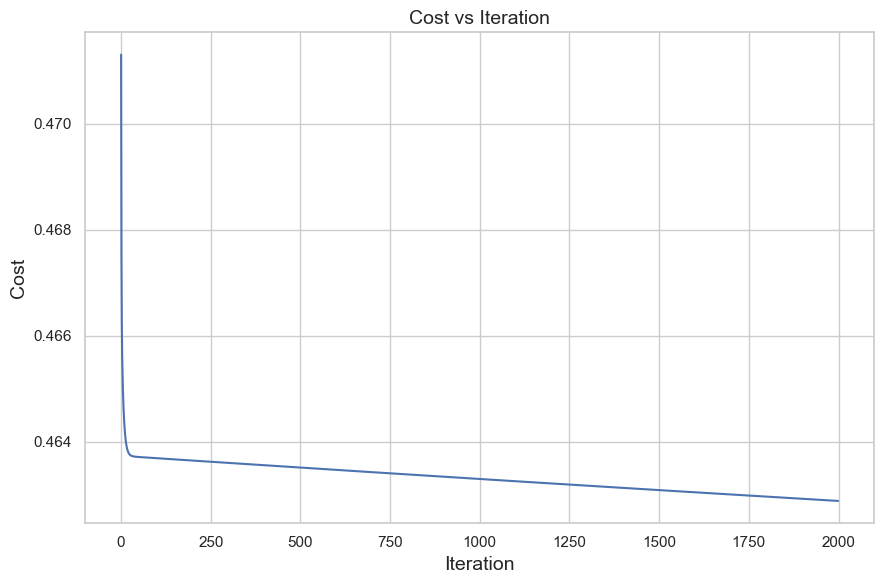

In [107]:
# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history_reg)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [108]:
# Prediction and evaluation on the training set and the test set
y_train_prob_reg = logistic(np.matmul(train_X.to_numpy(), w_out_reg) + (b_out_reg * np.ones(train_X.shape[0])))
y_train_pred_reg = (y_train_prob_reg > 0.5).astype(int)
print(pd.Series({"Training accuracy": accuracy(train_Y, y_train_pred_reg)}))
print(y_train_pred_reg)

Training accuracy    0.796857
dtype: float64
[0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 

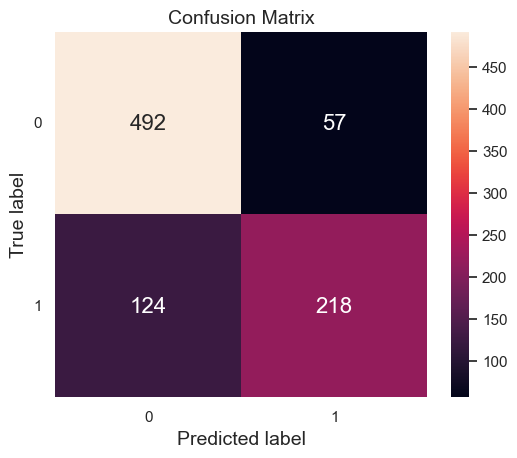

In [109]:
# Confusion matrix for predictions on the test set
conf_mat_heatmap(train_Y, y_train_pred_reg)